In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tmdb-movie-metadata


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

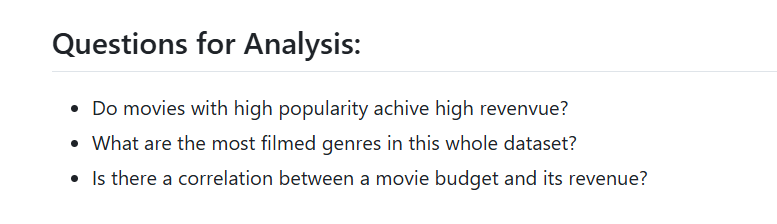

In [3]:
df = pd.read_csv(path + "/tmdb_5000_movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
useless_columns = [
    'homepage',
    'id',
    'keywords',
    'original_language',
    'overview',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'status',
    'tagline'
]

In [6]:
df.drop(columns=useless_columns, inplace=True)
df

,budget,genres,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",El Mariachi,14.269792,1992-09-04,2040920,81.0,El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Newlyweds,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6
4801,0,[],Shanghai Calling,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7


In [7]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [8]:
import json

In [9]:
def convert(obj, attr, sep):
    to_json = json.loads(obj)

    converted_obj = ''
    for item in to_json:
        converted_obj += f'{item[attr]}{sep}'

    if converted_obj == '':
        return np.nan
    return converted_obj[:-1]

In [10]:
df['genres'] = df['genres'].apply(lambda x: convert(x, 'name', ','))

In [11]:
genres_encoded = df['genres'].str.get_dummies(sep=',')
genres_encoded

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4799,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4800,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
for column in genres_encoded.columns:
    df[column] = genres_encoded[column]

In [13]:
df.drop(columns='genres', inplace=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,1,...,0,0,0,0,0,1,0,0,0,0
1,300000000,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,1,...,0,0,0,0,0,0,0,1,0,0
4,260000000,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,El Mariachi,14.269792,1992-09-04,2040920,81.0,El Mariachi,6.6,238,1,...,0,0,0,0,0,0,0,1,0,0
4799,9000,Newlyweds,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5,0,...,0,0,0,0,1,0,0,0,0,0
4800,0,"Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6,0,...,0,0,0,0,1,0,1,0,0,0
4801,0,Shanghai Calling,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])
df

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,1,...,0,0,0,0,0,1,0,0,0,0
1,300000000,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,1,...,0,0,0,0,0,0,0,1,0,0
4,260000000,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,El Mariachi,14.269792,1992-09-04,2040920,81.0,El Mariachi,6.6,238,1,...,0,0,0,0,0,0,0,1,0,0
4799,9000,Newlyweds,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5,0,...,0,0,0,0,1,0,0,0,0,0
4800,0,"Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6,0,...,0,0,0,0,1,0,1,0,0,0
4801,0,Shanghai Calling,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df['year'] = df['release_date'].apply(lambda x: x.year)
df['month'] = df['release_date'].apply(lambda x: x.month)
df['decade'] = df['release_date'].apply(lambda x: (x.year // 10) * 10)
df

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,Action,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year,month,decade
0,237000000,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,1,...,0,0,1,0,0,0,0,2009.0,12.0,2000.0
1,300000000,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,1,...,0,0,0,0,0,0,0,2007.0,5.0,2000.0
2,245000000,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,1,...,0,0,0,0,0,0,0,2015.0,10.0,2010.0
3,250000000,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,1,...,0,0,0,0,1,0,0,2012.0,7.0,2010.0
4,260000000,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,1,...,0,0,1,0,0,0,0,2012.0,3.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,El Mariachi,14.269792,1992-09-04,2040920,81.0,El Mariachi,6.6,238,1,...,0,0,0,0,1,0,0,1992.0,9.0,1990.0
4799,9000,Newlyweds,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5,0,...,0,1,0,0,0,0,0,2011.0,12.0,2010.0
4800,0,"Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6,0,...,0,1,0,1,0,0,0,2013.0,10.0,2010.0
4801,0,Shanghai Calling,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7,0,...,0,0,0,0,0,0,0,2012.0,5.0,2010.0


<Axes: >

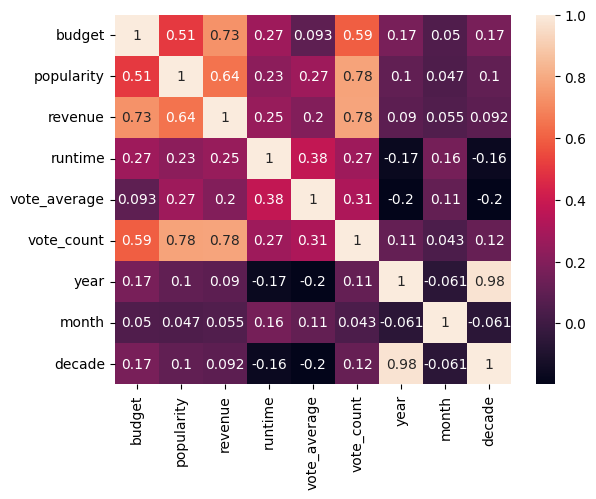

In [16]:
sns.heatmap(df.drop(columns=genres_encoded.columns).corr(numeric_only=True), annot=True)

Looking at the correlation graph, what can be said about the relationship between popularity and revenue is that they are directly proportional to each other at a fair level.

The same can be said about budget and revenue, although their correlation is a little bit higher.

Also, as expected, the correlation between vote count and popularity is high because more votes mean more people have seen the movie.

On the polar opposite, the correlation between vote average and the financial aspects of the movie is almost zero, which means that they are not a major factor when it comes to a person's enjoyment.

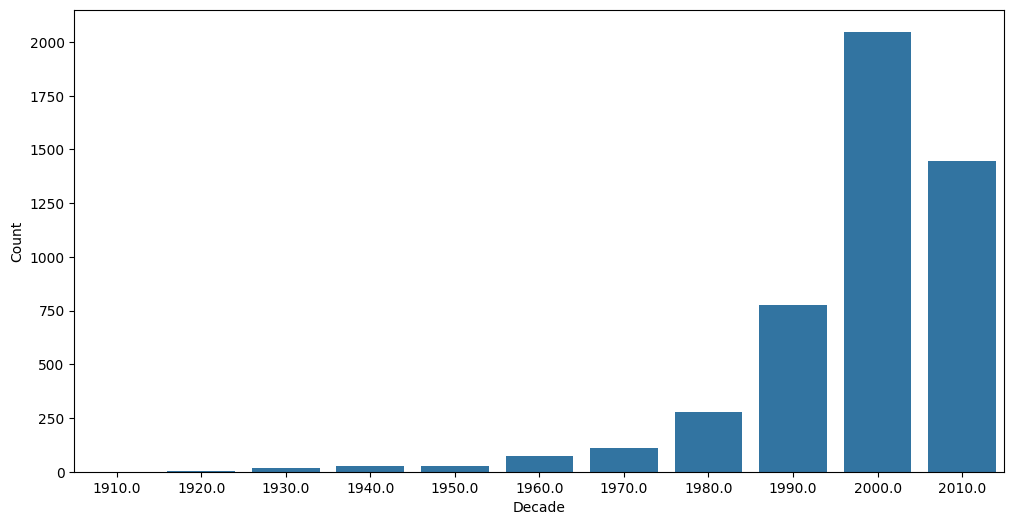

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

As seen in the above graph, the dataset, when it comes to movies per decade, is very unbalanced, so the metrics displayed with it are less accurate.

In [17]:
# Most produced genres

df[genres_encoded.columns].sum().sort_values(ascending=False).head(5)

,0
Drama,2297
Comedy,1722
Thriller,1274
Action,1154
Romance,894


In [42]:
# Number of movies made in each decade separated by genre

decade_count_by_genre = df.groupby(['decade'])[genres_encoded.columns].sum()
decade_count_by_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,
1910.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1920.0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,3,1,0,1,1,0
1930.0,2,3,1,7,0,0,8,2,2,0,1,0,3,0,8,0,0,0,3,0
1940.0,2,1,3,1,2,0,16,5,2,0,2,0,4,4,8,0,0,2,2,3
1950.0,4,3,0,4,3,0,20,0,0,0,4,1,4,1,10,2,0,2,3,3
1960.0,17,14,1,15,10,0,42,7,1,1,12,5,8,6,13,5,1,15,7,11
1970.0,33,29,0,26,13,2,49,7,6,0,7,15,9,5,16,27,0,26,9,4
1980.0,84,75,4,82,32,1,100,19,36,0,17,59,12,11,37,55,0,71,12,9
1990.0,200,127,26,317,147,3,396,79,84,6,27,67,20,71,168,92,0,225,17,10


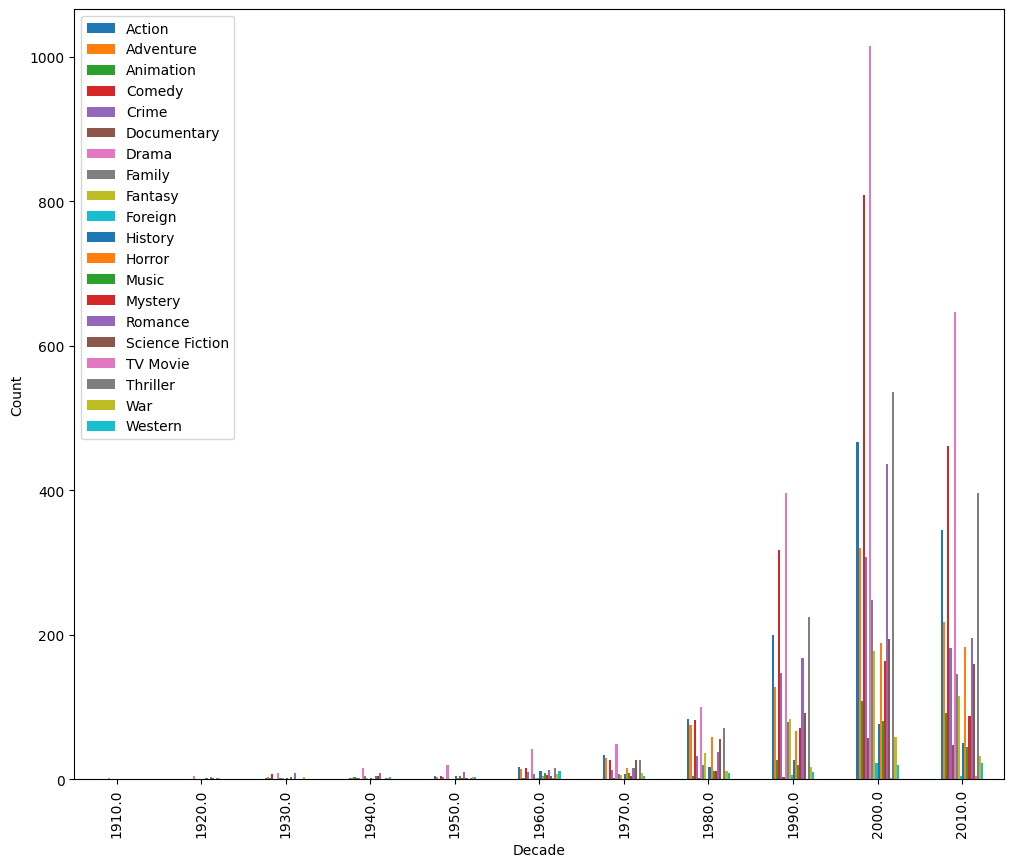

In [46]:
decade_count_by_genre.plot(kind='bar', figsize=(12, 10))
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

In [ ]:
# Mean Rating for each Genre

for genre in df[genres_encoded.columns].columns:
    average_rate = df[df[genre] == 1]['vote_average'].mean()
    print(f'{genre}: {average_rate}')

Action: 5.989514731369151
Adventure: 6.156962025316456
Animation: 6.341452991452992
Comedy: 5.945586527293844
Crime: 6.274137931034482
Documentary: 6.238181818181818
Drama: 6.388593818023509
Family: 6.029629629629629
Fantasy: 6.096698113207547
Foreign: 6.352941176470588
History: 6.71979695431472
Horror: 5.626589595375722
Music: 6.355675675675675
Mystery: 6.183908045977011
Romance: 6.207718120805369
Science Fiction: 6.005607476635514
TV Movie: 5.6625000000000005
Thriller: 6.010989010989011
War: 6.713888888888889
Western: 6.1780487804878055


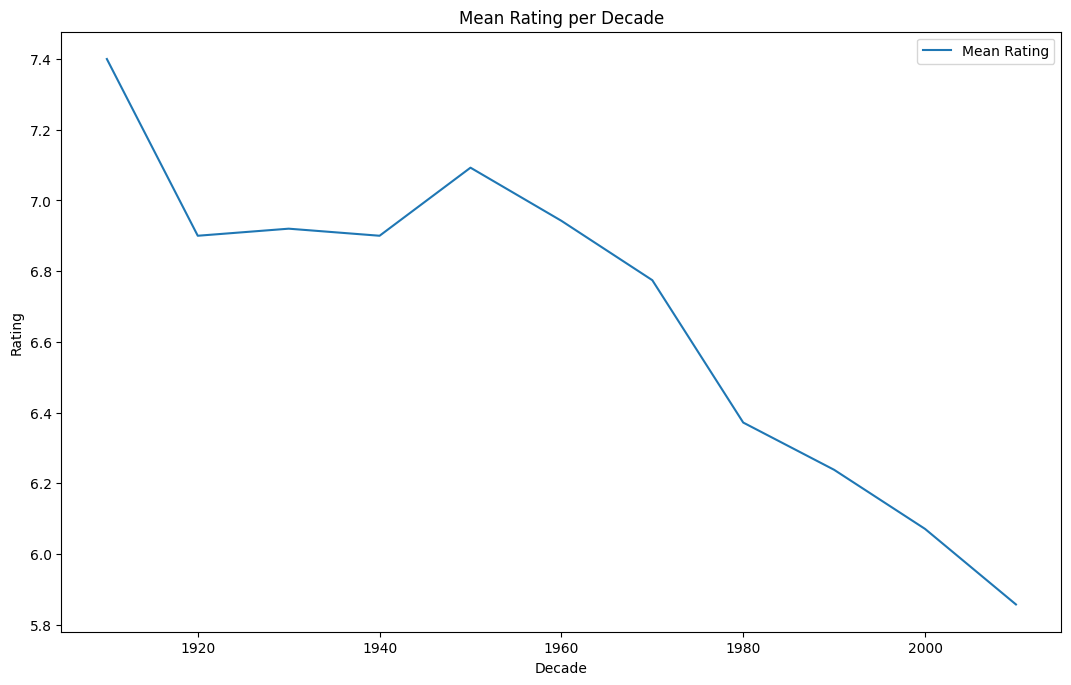

In [ ]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.groupby(['decade']).agg({'vote_average': 'mean'}), label='Mean Rating')

ax.set_xlabel('Decade')
ax.set_ylabel('Rating')
ax.set_title('Mean Rating per Decade')
ax.legend()
plt.show()

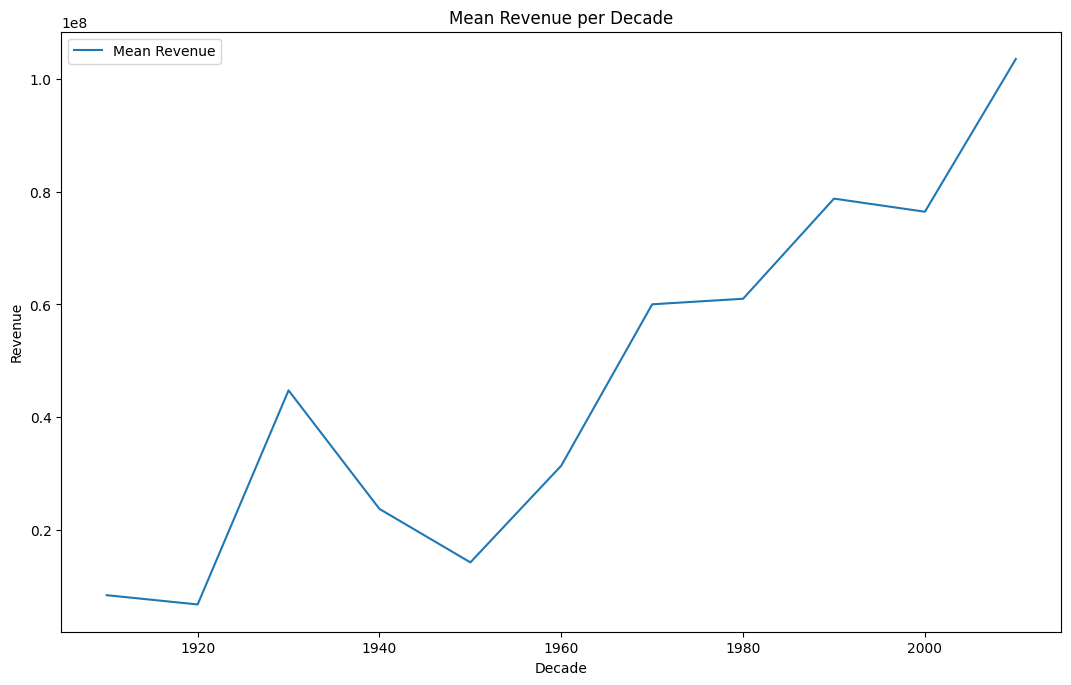

In [ ]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.groupby(['decade']).agg({'revenue': 'mean'}), label='Mean Revenue')

ax.set_xlabel('Decade')
ax.set_ylabel('Revenue')
ax.set_title('Mean Revenue per Decade')
ax.legend()
plt.show()

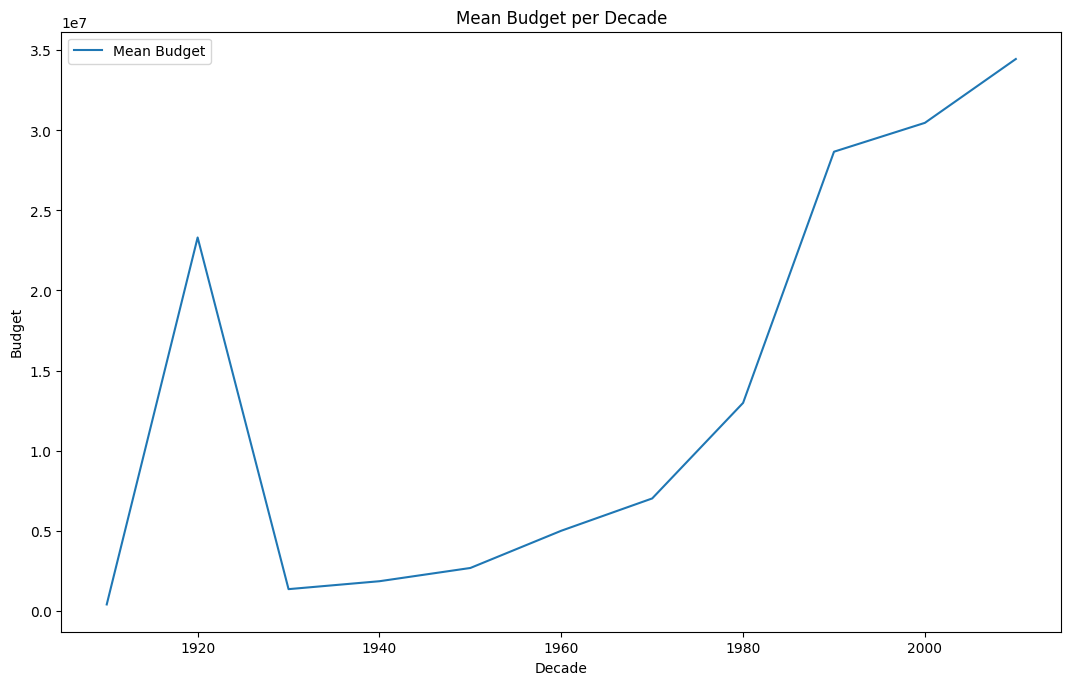

In [ ]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.groupby(['decade']).agg({'budget': 'mean'}), label='Mean Budget')

ax.set_xlabel('Decade')
ax.set_ylabel('Budget')
ax.set_title('Mean Budget per Decade')
ax.legend()
plt.show()

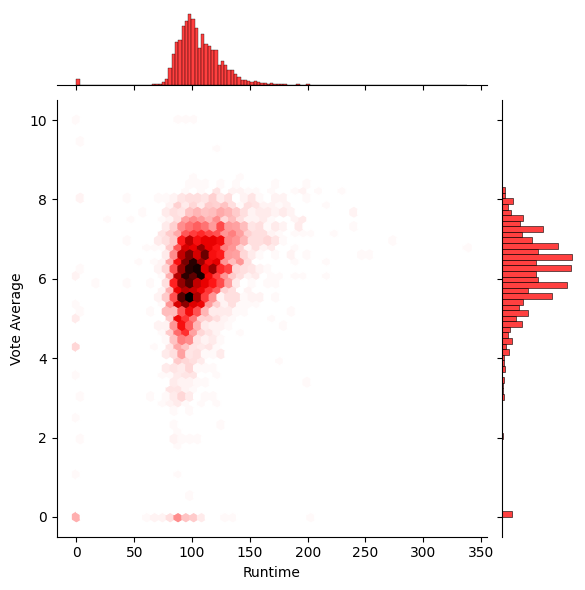

In [ ]:
sns.jointplot(data=df, x='runtime', y='vote_average', kind='hex', color='red')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.show()

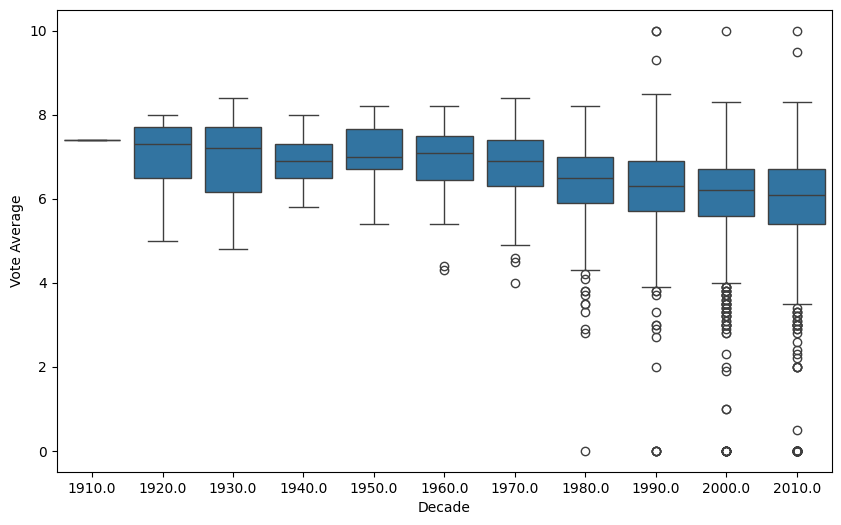

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='decade', y='vote_average')
plt.xlabel('Decade')
plt.ylabel('Vote Average')
plt.show()

The fact recent decades have more outliers than older ones probably means that when someone watches an older movie, they're more susceptible to like them, it's a more conscious choice than when you're watching a new movie because it's popular.